##1, 2

In [ ]:
import numpy as np
import pandas as pd



file = pd.read_csv("anime.csv")
df = pd.DataFrame(data = file)

df.head(10)

,Title,Production,Episodes,Source,Genre,Airdate,Rating,Voters,Theme
0,Shingeki no Kyojin,Wit Studio,25,Manga,"Action,Drama,Fantasy,Mystery","Apr 7, 2013, 01:58 (JST)",8.52,"3,142,121","Military,Super Power"
1,Fullmetal Alchemist: Brotherhood,Bones,64,Manga,"Action,Adventure,Comedy,Drama,Fantasy","Apr 5, 2009, 17:00 (JST)",9.16,"2,676,911",Military
2,Sword Art Online,A-1 Pictures,25,Light novel,"Action,Adventure,Fantasy,Romance","Jul 8, 2012, 00:00 (JST)",7.20,"2,586,628",Game
3,One Punch Man,Madhouse,12,Web manga,"Action,Comedy,Sci-Fi,Supernatural","Oct 5, 2015, 01:05 (JST)",8.52,"2,583,068","Parody,Super Power"
4,Boku no Hero Academia,Bones,13,Manga,"Action,Comedy","Apr 3, 2016, 17:00 (JST)",7.98,"2,426,309","School,Super Power"
5,Tokyo Ghoul,Studio Pierrot,12,Manga,"Action,Drama,Horror,Mystery,Supernatural","Jul 4, 2014, 00:00 (JST)",7.80,"2,315,361",Psychological
6,Naruto,Studio Pierrot,220,Manga,"Action,Adventure,Comedy","Oct 3, 2002, 19:30 (JST)",7.95,"2,289,448","Martial Arts,Super Power"
7,Hunter x Hunter (2011),Madhouse,148,Manga,"Action,Adventure,Fantasy","Oct 2, 2011, 10:55 (JST)",9.06,"2,152,116",Super Power
8,Kimetsu no Yaiba,ufotable,26,Manga,"Action,Supernatural","Apr 6, 2019, 23:30 (JST)",8.57,"2,112,029","Demons,Historical"
9,Shingeki no Kyojin Season 2,Wit Studio,12,Manga,"Action,Drama,Fantasy,Mystery","Apr 1, 2017, 22:00 (JST)",8.49,"2,086,165","Military,Super Power"


## 3

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       1992 non-null   object 
 1   Production  1992 non-null   object 
 2   Episodes    1992 non-null   object 
 3   Source      1992 non-null   object 
 4   Genre       1992 non-null   object 
 5   Airdate     1020 non-null   object 
 6   Rating      1944 non-null   float64
 7   Voters      1992 non-null   object 
 8   Theme       1992 non-null   object 
dtypes: float64(1), object(8)
memory usage: 140.2+ KB


## 4

In [ ]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df.head()

## 5

In [ ]:
df.describe()

,rating
count,1944.000000
mean,7.150849
std,0.709454
min,2.960000
25%,6.720000
50%,7.210000
75%,7.590000
max,9.160000


In [ ]:
df = df.replace({'episodes': '?'}, -1)
df = df.replace({'episodes': -1}, np.NaN)
df['episodes'] = df['episodes'].astype('float64')
#df['voters'] = df['voters']
#df['voters'] = df['episodes'].astype('float64')

In [ ]:
#df['voters'][:] = df['voters'][:].replace(',',' ')
for i in range(df.shape[0]):
  df.iloc[i, 7] = df.iloc[i,7].replace(',', '')

df['voters'] = df['voters'].astype('int32')

## 6

In [ ]:
for i in range(df.shape[1]):
  if df.iloc[:,i].dtype == 'object':
    print(df.iloc[:,i].value_counts())
    print('\n')

Shingeki no Kyojin                                      1
Ginga Eiyuu Densetsu: Arata Naru Tatakai no Overture    1
Mobile Suit Gundam AGE                                  1
Atom: The Beginning                                     1
Hellsing: Psalm of the Darkness                         1
                                                       ..
Mai-HiME                                                1
Kengan Ashura                                           1
Katsute Kami Datta Kemono-tachi e                       1
Fate/kaleid liner Prisma☆Illya 3rei!!                   1
Burn Up Scramble                                        1
Name: title, Length: 1992, dtype: int64


Toei Animation         130
Sunrise                125
Madhouse                83
A-1 Pictures            78
Bones                   73
                      ... 
Nakamura Production      1
Anima&Co.                1
G&G Entertainment        1
Fifth Avenue             1
Vega Entertainment       1
Name: production, Lengt

## 7

In [ ]:
for i in range(df.shape[1]):
  print(df.iloc[:,i].isna().value_counts())
  print('\n')

False    1992
Name: title, dtype: int64


False    1992
Name: production, dtype: int64


False    1939
True       53
Name: episodes, dtype: int64


False    1992
Name: source, dtype: int64


False    1992
Name: genre, dtype: int64


False    1020
True      972
Name: airdate, dtype: int64


False    1944
True       48
Name: rating, dtype: int64


False    1992
Name: voters, dtype: int64


False    1992
Name: theme, dtype: int64




In [ ]:
df.fillna(df['rating'].mean())

,title,production,episodes,source,genre,airdate,rating,voters,theme
0,Shingeki no Kyojin,Wit Studio,25.000000,Manga,"Action,Drama,Fantasy,Mystery","Apr 7, 2013, 01:58 (JST)",8.520000,3142121,"Military,Super Power"
1,Fullmetal Alchemist: Brotherhood,Bones,64.000000,Manga,"Action,Adventure,Comedy,Drama,Fantasy","Apr 5, 2009, 17:00 (JST)",9.160000,2676911,Military
2,Sword Art Online,A-1 Pictures,25.000000,Light novel,"Action,Adventure,Fantasy,Romance","Jul 8, 2012, 00:00 (JST)",7.200000,2586628,Game
3,One Punch Man,Madhouse,12.000000,Web manga,"Action,Comedy,Sci-Fi,Supernatural","Oct 5, 2015, 01:05 (JST)",8.520000,2583068,"Parody,Super Power"
4,Boku no Hero Academia,Bones,13.000000,Manga,"Action,Comedy","Apr 3, 2016, 17:00 (JST)",7.980000,2426309,"School,Super Power"
...,...,...,...,...,...,...,...,...,...
1987,Dog Days' Specials,Seven Arcs,13.000000,-,"Action,Adventure,Fantasy",7.150849,6.660000,8687,-
1988,Bleach: Gotei 13 Omake,-,1.000000,Manga,"Action,Adventure",7.150849,6.490000,8682,-
1989,Brain Powerd,Sunrise,26.000000,Original,"Action,Adventure,Sci-Fi","Apr 8, 1998",6.100000,8678,Mecha
1990,Mobile Suit Gundam: Iron-Blooded Orphans - Urð...,Sunrise Beyond,7.150849,Original,"Action,Drama,Sci-Fi",7.150849,7.150849,8665,"Mecha,Space"


## 8

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
df['production'].value_counts(ascending = True)

Vega Entertainment       1
Anima&Co.                1
Nakamura Production      1
The Answer Studio        1
Nice Boat Animation      1
                      ... 
Bones                   73
A-1 Pictures            78
Madhouse                83
Sunrise                125
Toei Animation         130
Name: production, Length: 224, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0, flags=flags)


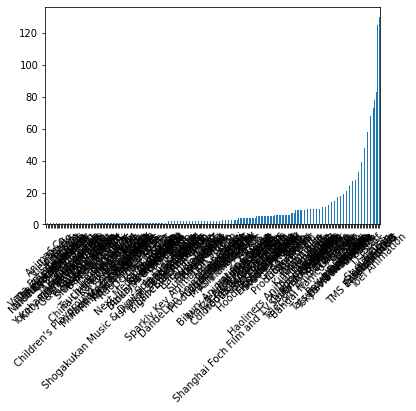

In [ ]:
df['production'].value_counts(ascending = True).plot.bar(rot=45)

In [ ]:
df['episodes'].value_counts(ascending = True)

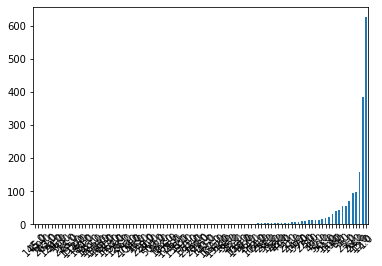

In [ ]:
df['episodes'].value_counts(ascending = True).plot.bar(rot=45)

In [ ]:
df['source'].value_counts()

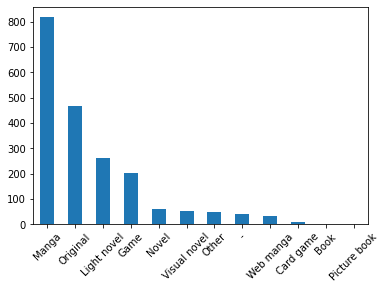

In [ ]:
df['source'].value_counts().plot.bar(rot=45)

In [ ]:
df['theme'].value_counts(ascending = True)

Demons,Mecha                                 1
Netflix,Sentai Filmworks                     1
Bandai Entertainment,Central Park Media      1
Harem,Police                                 1
Mecha,Military,Music,School,Space            1
                                          ... 
School                                      83
Mecha                                       85
-                                          134
Super Power                                163
Shounen                                    179
Name: theme, Length: 170, dtype: int64

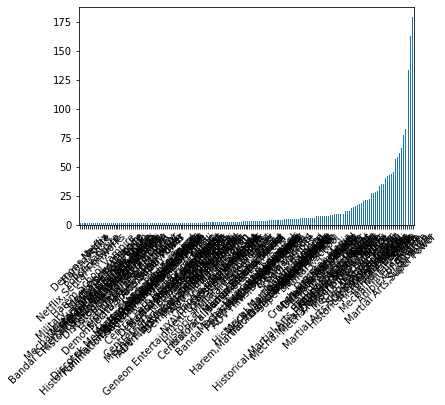

In [ ]:
df['theme'].value_counts(ascending = True).plot.bar(rot=45)

little problems:

In [ ]:
df_airdate = df['airdate'].copy()
df_airdate_years = pd.Series().astype('float64')
for i in range(df_airdate.value_counts().shape[0]):
  df_airdate_years.append(pd.Series(df_airdate.value_counts().index.str.split(',')[i][1]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


Series([], dtype: float64)


In [ ]:

df_airdate.value_counts()
#df_airdate_years = pd.Series(df_airdate.value_counts().index.str.split(','))
#df_airdate.value_counts().index.str = df_airdate.value_counts().index.str.split(',')
#df_airdate_years
tmp3 = np.array(df_airdate.value_counts().index)
#print(tmp3[:].str.split(',')[1])
type(tmp3[:])

numpy.ndarray

## 9

In [ ]:
df.groupby('production')['rating'].mean().sort_values()

production
Visual Flight            2.960
Gambit                   3.700
l-a-unch・BOX             3.810
Zero-G Room              5.310
Blade                    5.410
                         ...  
Bandai Namco Pictures    8.335
B.CMAY PICTURES          8.400
Bibury Animation CG        NaN
HORNETS                    NaN
OZ                         NaN
Name: rating, Length: 224, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0, flags=flags)


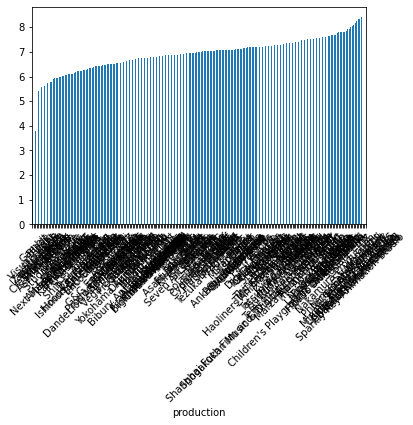

In [ ]:
df.groupby('production')['rating'].mean().sort_values().plot.bar(rot = 45)

##10

In [ ]:
cut_bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
pd.cut(df['rating'], bins=cut_bins).value_counts(sort=False)

(0, 1]        0
(1, 2]        0
(2, 3]        1
(3, 4]        2
(4, 5]        8
(5, 6]       97
(6, 7]      622
(7, 8]     1012
(8, 9]      195
(9, 10]       7
Name: rating, dtype: int64

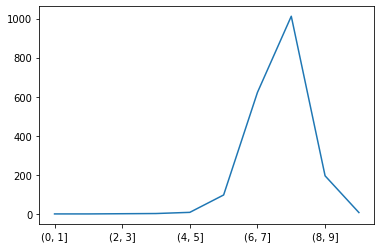

In [ ]:
pd.cut(df['rating'], bins=cut_bins).value_counts(sort=False).plot.line()

## 11

In [ ]:
df[df['rating'] > 6.5]['genre'].value_counts()

Action,Sci-Fi                                                  104
Action,Drama,Sci-Fi                                             76
Action,Adventure,Comedy,Fantasy                                 74
Action                                                          70
Action,Adventure,Fantasy                                        65
                                                              ... 
Action,Boys Love,Drama,Fantasy,Mystery,Romance,Supernatural      1
Action,Comedy,Drama,Mystery,Romance,Suspense                     1
Action,Drama,Romance,Sports                                      1
Action,Comedy,Fantasy,Sci-Fi,Supernatural                        1
Action,Comedy,Drama,Romance                                      1
Name: genre, Length: 245, dtype: int64

In [ ]:
df[df['rating'] > 6.5]['theme'].value_counts()

Shounen                                      159
Super Power                                  145
-                                             77
School                                        66
Mecha                                         61
                                            ... 
Mecha,Military,Parody,Space                    1
Psychological,School                           1
Geneon Entertainment USA,Sentai Filmworks      1
Military,Super Power,Vampire                   1
Demons,Mecha                                   1
Name: theme, Length: 153, dtype: int64

## 12

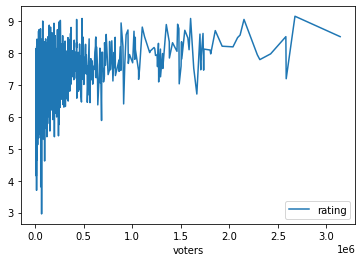

In [ ]:
df.plot(x='voters', y = 'rating', kind='line')

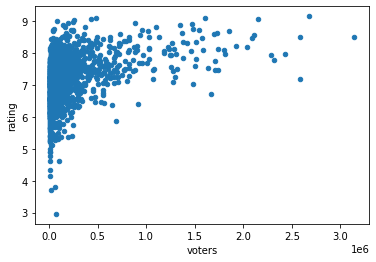

In [ ]:
df.plot(x='voters', y = 'rating', kind='scatter')